#**CHAPTER 5 지도학습: 회귀**

지도학습의 문제는 '회귀'와 '분류'의 문제로 나눌 수 있다. 회귀는 입력에 대해 연속적인 값을 대응시키는 문제며, 분류는 입력에 대해 순서가 없는 클래스(라벨)를 대응시키는 문제다. 이번 챕터에서는 회귀 문제를 살펴볼 것이다.

##**5.1 1차원 입력 직선 모델**

나이 x와 키t가 세트로 된 데이터를 생각해보자.

$$x = \begin{pmatrix}
x_0 \\ 
x_1 \\ 
\vdots \\
x_n \\
\vdots \\
x_{N-1}
\end{pmatrix}
, t= \begin{pmatrix}
t_0 \\ 
t_1 \\ 
\vdots \\
t_n \\
\vdots \\
t_{N-1}
\end{pmatrix}$$

N은 인원수를 나타내고 X<sub>n</sub>을 '입력변수',t<sub>n</sub>를 '목표변수(대상)'이라고 한다. n은 각 개인을 나타내는 데이터의 인덱스다.

목적은 데이터베이스에 없는 사람의 나이에 대해 그 사람의 키 t를 예측하는 것이다. 

먼저 아래의 코드를 통해서 나이와 몸무게에 대한 인공 데이터를 만든다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# 데이터 생성 --------------------------------
np.random.seed(seed=1) # 난수를 고정
X_min = 4 # X의 하한
X_max = 30 # X의 상한
X_n = 16 # X의 데이터 수
X = 5 + 25 * np.random.rand(X_n)
Prm_c = [170, 108, 0.2] # 생성 매개 변수
T = Prm_c[0] - Prm_c[1] * np.exp(-Prm_c[2] * X) \
+ 4 * np.random.randn(X_n) # (A)
np.savez('ch5_data.npz', X=X, X_min=X_min, X_max=X_max, X_n=X_n, T=T) # (B)

In [ ]:
#나이에 대한 데이터
print(X)


[15.42555012 23.00811234  5.00285937 12.55831432  8.66889727  7.30846487
  9.65650528 13.63901818 14.91918686 18.47041835 15.47986286 22.13048751
 10.11130624 26.95293591  5.68468983 21.76168775]


In [ ]:
# np.round함수를 사용해 소수점 2번째 자리까지 나타내었다.
print(np.round(X, 2))


[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]


In [ ]:
# 키에 대한 데이터
print(np.round(T, 2))


[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


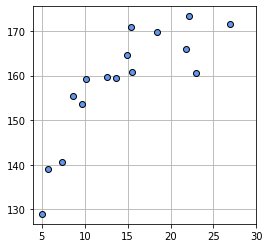

In [ ]:
# 데이터 그래프 ------------------------------
plt.figure(figsize=(4, 4))
plt.plot(X, T, marker='o', linestyle='None',
         markeredgecolor='black', color='cornflowerblue')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()


###**5.1.1 직선 모델**

위의 그래프를 보면 데이터가 고르지 않기 때문에, 새로운 나이 데이터에 키를 정확히 맞추기는 불가능하다는 것을 알 수 있다. 그러나 어느 정도 오처를 허용한다면 주어진 데이터에서 직선을 긋는 것으로, 그럴듯하게 예측할 수 있을 것이다.

직선의 방정식은 $$y(x) = w_0x + w_1$$과 같이 나타낼 수 있다.

기울기를 나타내는 w0과 절편을 나타내는 w1에 적당한 값을 넣으면, 다양한 위치와 기울기의 직선을 만들 수 있다. 이 수식은 입력 x에 y(x)를 출력하는 함수로 볼 수 있으므로, y(x)는 x에 대한 t의 예측치로 간주할 수 있다.

그렇다면 직선이 데이터에 부합하려면 w0과 w1을 어떻게 정할수 있을까?

###**5.1.2 제곱 오차함수**

'데이터에 부합하도록' 오차 J를 정의한다.

$$J = \frac{1}{N}\sum_{n=0}^{N-1}(y_n - t_n)^2 $$

여기서 yn은 직선 모델에 xn을 넣었을 때의 출력을 나타낸다.

$$y_n = y(x_n) = w_0x_n + w_1$$

위의 식에서 J는 평균 제곱 오차로, 직선과 데이터 점의 차의 제곱의 평균을 나타낸다. 

w0과 w1을 결정하면 그에 대한 평균 제곱 오차J를 계산할 수 있다. 어떤 w0과 w1쌍의 직선은 데이터에서 크게 벗어나 J가 커질 수 있고 반대로 다른 w0과 w1은 선이 데이터에 가까워서 J가 작은 값을 가지게 될 수도 있다. 그러나 어떤 w0과 w1을 선택하더라도, 데이터가 직선 상에 나란히 있지 않기 때문에 J는 0이 될 수 없다.

이 w와 J의 관계를 아래에서 그래프로 나타내었다.

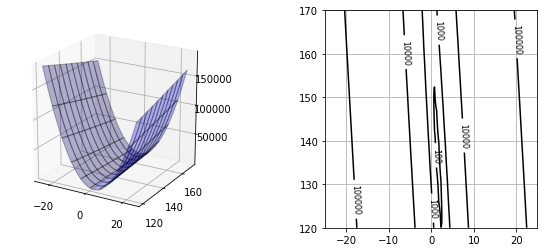

In [ ]:

from mpl_toolkits.mplot3d import Axes3D
# 평균 오차 함수 ------------------------------
def mse_line(x, t, w):
    y = w[0] * x + w[1]
    mse = np.mean((y - t)**2)
    return mse

# 계산 --------------------------------------
xn = 100 # 등고선 표시 해상도
w0_range = [-25, 25]
w1_range = [120, 170]
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
J = np.zeros((len(x0), len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        J[i1, i0] = mse_line(X, T, (x0[i0], x1[i1]))

# 표시 --------------------------------------
plt.figure(figsize=(9.5, 4))
plt.subplots_adjust(wspace=0.5)

ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(xx0, xx1, J, rstride=10, cstride=10, alpha=0.3,
                color='blue', edgecolor='black')
ax.set_xticks([-20, 0, 20])
ax.set_yticks([120, 140, 160])
ax.view_init(20, -60)

plt.subplot(1, 2, 2)
cont = plt.contour(xx0, xx1, J, 30, colors='black',
                   levels=[100, 1000, 10000, 100000])
cont.clabel(fmt='%1.0f', fontsize=8)
plt.grid(True)
plt.show()


w공간에서의 평균 제곱 오차는 마치 계곡과 같은 모양을 하고 있다. 실제 그래프를 보면 w0방향의 변화에 J가 크게 변하는 것을 알 수 있다. 기울기가 조금이라도 바뀌면 직선이 데이터 점에서 크게 어긋나기 때문이다. 

그러나 이 왼쪽의 그래프로는 w1 방향의 변화를 알기 힘들다. 그래서 오른쪽의 등고선 그래프를 나타내었다. 그러면 계곡의 바닥도 절편 w1 방향으로 높이가 변화하는 것으로 나타난다. 여기서는 w0 =3, w1=135 근처에서 J가 최솟값을 갖을것 처럼 보인다.

###**5.1.3 매개 변수 구하기(경사 하강법)**
그럼 J가 가장 작아지는 w0과 w1을 구하는 가장 간단하고 기본적인 방법은 경사 하강법이다.

우선 초기 위치로 적당한 w0과 w1를 결정한다. 이것은 J지형 위의 한 지점에 대응한다. 이 점에서의 기울기를 확인하고 J가 가장 감소하는 방향으로 w0과 w1를 조금만 진행한다. 이 절차를 여러 번 반복하여 최종적으로 J가 가장 작아지는 w0과 w1에 도착할 수 있다.

어느 지점(w0,w1)에서 언덕의 위쪽 방향은 J를 w0과 w1로 편미분한 벡터$$[\frac{\partial J}{\partial w_0} \frac{\partial J}{\partial w_1}]^T$$ 로 표시된다. 이것을 J의 기울기로 부르며, $$\nabla wJ$$로 나타낸다. J를 최소화하려면 J의 기울기의 반대방향 $$-\nabla wJ =- [\frac{\partial J}{\partial w_0} \frac{\partial J}{\partial w_1}]^T$$ 으로 진행해야 한다.

즉 w의 갱신 방법을 행렬 표기로 나타내면 다음과 같다.

$$w(t+1) = w(t) - \alpha\nabla_w J|_{w(t)}$$

이때 a는 학습율이라고 불리는 양수 값을 취하는 매개 변수로, w 갱신의 폭을 조절한다. 큰 편이 갱신은 커지지만, 수습이 어려워지므로 적당한 값을 선택해야 한다.

학습법칙을 성분 표기로 나타내면 다음과 같다.

$$w0(t+1) = w_0(t) - \alpha\frac{\partial J}{\partial w_0}|_{w_0(t),w_1(t)}$$

$$w1(t+1) = w_1(t) - \alpha\frac{\partial J}{\partial w_1}|_{w_0(t),w_1(t)}$$

이 식에 대한 편미분을 계산해보면

$$ J = \frac{1}{N}\sum_{n=0}^{N-1}(y_n-t_n)^2 = \frac{1}{N}\sum_{n=0}^{N-1}(w_0x_n+w_1-t_n)^2 $$

$$ \frac{\partial J}{\partial w_0}= \frac{2}{N}\sum_{n=0}^{N-1}(w_0x_n+w_1-t_n)x_n = \frac{2}{N}\sum_{n=0}^{N-1}(y_n-t_n)x_n $$ 이 된다.

같은 방법으로 w1로 편미분 하면

$$ \frac{\partial J}{\partial w_1}= \frac{2}{N}\sum_{n=0}^{N-1}(w_0x_n+w_1-t_n) = \frac{2}{N}\sum_{n=0}^{N-1}(y_n-t_n) $$ 이 된다.

따라서 학습법칙은 

$$w_0(t+1) = w_0(t) - \alpha\frac{2}{N}\sum_{n=0}^{N-1}(y_n-t_n)x_n$$

$$w_1(t+1) = w_1(t) - \alpha\frac{2}{N}\sum_{n=0}^{N-1}(y_n-t_n)$$

이다. 학습 법칙이 구체적으로 나타났으므로, 이것을 프로그램으로 구현하면 밑의 코드로 나타난다.

In [ ]:

# 평균 제곱 오차의 기울기 ------------------------
def dmse_line(x, t, w):
    y = w[0] * x + w[1]
    d_w0 = 2 * np.mean((y - t) * x)
    d_w1 = 2 * np.mean(y - t)
    return d_w0, d_w1


In [ ]:

d_w = dmse_line(X, T, [10, 165])
print(np.round(d_w, 1))
#차례로 w0 방향과 w1 방향의 기울기를 나타낸다.

[5046.3  301.8]


반복 횟수 13820
W=[1.539947, 136.176160]
dMSE=[-0.005794, 0.099991]
MSE=49.027452


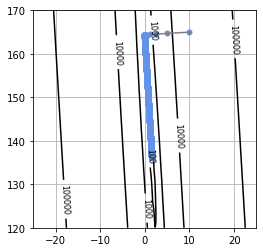

In [ ]:

# 경사하강법 ------------------------------------
def fit_line_num(x, t):
    w_init = [10.0, 165.0] # 초기 매개 변수
    alpha = 0.001 # 학습률
    i_max = 100000 # 반복의 최대 수
    eps = 0.1 # 반복을 종료 기울기의 절대 값의 한계
    w_i = np.zeros([i_max, 2])
    w_i[0, :] = w_init
    for i in range(1, i_max):
        dmse = dmse_line(x, t, w_i[i - 1])
        w_i[i, 0] = w_i[i - 1, 0] - alpha * dmse[0]
        w_i[i, 1] = w_i[i - 1, 1] - alpha * dmse[1]
        if max(np.absolute(dmse)) < eps: # 종료판정, np.absolute는 절대치
            break
    w0 = w_i[i, 0]
    w1 = w_i[i, 1]
    w_i = w_i[:i, :]
    return w0, w1, dmse, w_i


# 메인 ------------------------------------
plt.figure(figsize=(4, 4)) # MSE의 등고선 표시
xn = 100 # 등고선 해상도
w0_range = [-25, 25]
w1_range = [120, 170]
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
J = np.zeros((len(x0), len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        J[i1, i0] = mse_line(X, T, (x0[i0], x1[i1]))
cont = plt.contour(xx0, xx1, J, 30, colors='black',
                   levels=(100, 1000, 10000, 100000))
cont.clabel(fmt='%1.0f', fontsize=8) 
plt.grid(True)
# 구배법 호출
W0, W1, dMSE, W_history = fit_line_num(X, T)
# 결과보기
print('반복 횟수 {0}'.format(W_history.shape[0]))
print('W=[{0:.6f}, {1:.6f}]'.format(W0, W1))
print('dMSE=[{0:.6f}, {1:.6f}]'.format(dMSE[0], dMSE[1]))
print('MSE={0:.6f}'.format(mse_line(X, T, [W0, W1])))
plt.plot(W_history[:, 0], W_history[:, 1], '.-',
         color='gray', markersize=10, markeredgecolor='cornflowerblue')
plt.show()


평균 제곱 오차 J의 등고선 위에 W의 갱신의 모습을 푸른 선으로 그렸다. 처음에는 가파른 계속으로 진행해 골짜기에 정착하면 계곡의 중앙 부근에 천천히 나아가서 기울기가 거의 없어지는 지점에 도달한다.

경사하강법을 통해서 구한 W0과 W1이 잘 구해졌는지를 확인하기 위해 처음 나타낸 데이터 그래프에 직선을 그려보았다.

w0=1.540, w1=136.176
SD=7.002 cm


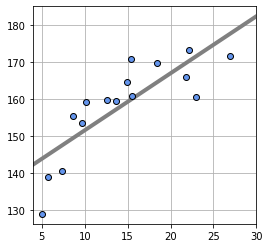

In [ ]:

# 선 표시 ----------------------------------
def show_line(w):
    xb = np.linspace(X_min, X_max, 100)
    y = w[0] * xb + w[1]
    plt.plot(xb, y, color=(.5, .5, .5), linewidth=4)


# 메인 ------------------------------------
plt.figure(figsize=(4, 4))
W=np.array([W0, W1])
mse = mse_line(X, T, W)
print("w0={0:.3f}, w1={1:.3f}".format(W0, W1))
# mse = mse_line(X, T, W)
print("SD={0:.3f} cm".format(np.sqrt(mse)))
show_line(W) 
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue', markeredgecolor='black') 
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()


직선을 통한 평균 제곱 오차는 49.03 $cm^2$이었고, 이는 직관적으로 오차가 얼마나 되는지 잘 알 수 없어서 제곱된 숫자를 이전으로 복원하기 위해 49.03의 제곱근을 취했다. 그러면 7.002가 된다, 즉 직선과 데이터의 차이는 대략 7cm정도 라는 것이다. 

오차가 대략 7cm라는 의미를 더 제대로 말하면, 오차가 정규 분포를 따른다고 가정했을 때, 전체의 68%의 데이터 점에서 오차가 7cm이하이다. 라는 뜻이 된다.

이처럼 J의 기울기만 구할 수 있으면, 최소 제곱법으로 극소값을 구할 수 있다. 주의할 점은 일반적으로 경사 하강법으로 구해지는 해는 어디까지나 극솟값이며, 전체의 최솟값을 아니라는 것이다. 만약 J가 곳곳에 움푹 들어간 모양을 하고 있으면, 최소 제곱법으로는 초기값 근처의 함몰 지점(극솟값)에 수렴하게 된다. 

J가 복잡한 모양을 하고 있을 때, 가장 깊은 함몰(최솟값)을 구하는 것은 어려운 문제다. 다양한 초기 값에서 경사 하강법을 여러 번 시도하여, 그 중 가장 J가 작아진 지점을 최솟값으로 채용하는 근사적인 방법도 생각할 수 있다.

그러나 여기에서 소개한 직선 모델의 경우, J가 w0과w1의 2차 함수로 되어있기 때문에 J는 함몰이 하나밖에 없는 '그릇형'이 됨을 보증한다. 따라서 어떤 초기값에서 시작하더라도 학습률을 적절하게 선택해두면, 언제나 최솟값으로 수렴한다.

###**5.1.4 선형 모델 매개 변수의 해석해**

경사 하강법은 반복 계산에 의해 근사값을 구하는 수치 계산법이다. 이러한 풀이를 수치해라고 한다. 그러나 사실 직선 모델의 경우에서는 근사적인 해석이 아니라 방정식을 해결하여 정확한 해를 구할 수 있다. 이러한 풀이를 해석해라고 한다. 해석해를 이용하면 반복 계산이 아니라 1회 계산으로 최적의 w를 구할 수 있다. 즉 계산 시간도 빠르고 답도 정확하다.

또한 해석해를 도출하면 문제의 본질을 잘 이해할 수 있고, 다차원 데이터에 대응하며, 곡선 모델로 확장하기 좋고, 커널법 등의 이해를 도와준다.

해석해를 구하기 위해 J가 극소화되는 지점 w를 찾으면 그 지점의 기울기는 0이므로, 기울기가 0이 되는 지점 즉 $\partial J/ \partial w_0 = 0$과 $\partial J/ \partial w_1 = 0 $을 충족하는 w0과 w1을 찾으면 된다.

$$\frac{\partial J}{\partial w_0}= \frac{2}{N}\sum_{n=0}^{N-1}(w_0x_n+w_1-t_n)x_n = 0$$

$$\frac{\partial J}{\partial w_1}= \frac{2}{N}\sum_{n=0}^{N-1}(w_0x_n+w_1-t_n) = 0$$

의 식에서 양변을 2로 나누고 합의 기호를 각 항에 전개하면,

$$\frac{1}{N}\sum_{n=0}^{N-1}(w_0x_n^2) + \frac{1}{N}\sum_{n=0}^{N-1}(w_1x_n) - \frac{1}{N}\sum_{n=0}^{N-1}(t_nx_n) = 0$$ 이 되고 w0,w1은 n과 관계가 없기 떄문에 합의 기호 밖으로 꺼내면 결과적으로 다음과 같은 식이 나온다.

$$w_0\frac{1}{N}\sum_{n=0}^{N-1}(x_n^2) + w_1\frac{1}{N}\sum_{n=0}^{N-1}(x_n) - \frac{1}{N}\sum_{n=0}^{N-1}(t_nx_n) = 0$$ 

또 이 식에서 $$ <x^2> = \frac{1}{N}\sum_{n=0}^{N-1}(x_n^2) , <x> = \frac{1}{N}\sum_{n=0}^{N-1}(x_n) ,  <tx> = \frac{1}{N}\sum_{n=0}^{N-1}(t_nx_n) $$ 로 나타내면 식은 다음과 같이 변한다.

$w_0 <x^2> + w_1<x> - <tx> = 0$

$w_0<x> + w_1 - <t> = 0 $

이 두가지 식을 통하여 w1,w0에 대한 식을 구할 수 있다.

$w_0 = \frac{<tx>-<t><x>}{<x^2>-<x>^2}$

$w_1 = <t> -w_0<x>$

위의 두가지 식이 w의 해석해다. 

입력 데이터 X와 목표 데이터 T의 값을 이 식에 넣어 W를 찾아보면, 경사 하강법과 거의 같은 결과가 얻어진다.


----------------------------------------------
* 커널법이란?

데이터의 분포가 어떤 분포를 따르는지 알 수 없는 경우에 데이터의 분포를 추정하여 확률 밀도를 추정하는데 이 추정 방법 중 하나가 커널법이다.

확률 밀도 추정의 목표는 확률 밀도, 즉 p(x)를 구하는 것이다. 이는 일정한 단위 안에 데이터가 몇개나 포함되는지의 값과 같다. 그러므로 p(x)가 다음 식에 비례함을 알 수 있다.

$p(x) = \frac{K}{NV}$

여기서 N은 전체 데이터 샘플의 수, K는 해당 지역 안에 있는 데이터의 수, V는 지역의 부피를 말한다. 이 식을 통해 우리는 일정 단위 안에 데이터가 포함될 확률, 즉 확률 밀도를 구할 수 있다. 이 식에서 N값은 고정인 상태고 V를 고정했을 때 그 안에 몇 개가 들어갈 수 있는지(K)를 찾아냄으로써 확률 밀도를 구하는 방식을 커널법이라고 한다.

이와 반대로, 안에 들어갈 개수(K)를 고정하고 그 부피를 결정하는 것을 K-nearest neighbor라고 한다.

w0=1.558, w1=135.872
SD=7.001 cm


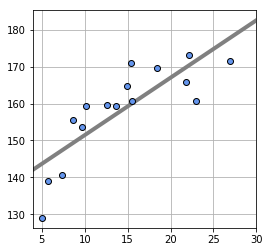

In [ ]:

# 해석해 ------------------------------------
def fit_line(x, t):
    mx = np.mean(x)
    mt = np.mean(t)
    mtx = np.mean(t * x)
    mxx = np.mean(x * x)
    w0 = (mtx - mt * mx) / (mxx - mx**2)
    w1 = mt - w0 * mx
    return np.array([w0, w1])

# 메인 ------------------------------------
W = fit_line(X, T)
print("w0={0:.3f}, w1={1:.3f}".format(W[0], W[1]))
mse = mse_line(X, T, W)
print("SD={0:.3f} cm".format(np.sqrt(mse)))
plt.figure(figsize=(4, 4))
show_line(W)
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()


##**5.2 2차원 입력면 모델**

입력이 2차원인 경우, x = (x0,x1)에 확장한다. 1차원의 경우는 $x_n$은 나이만을 의미했지만, 이제는 몸무게 정보도 함께 사용하여 키를 예측한다.



In [ ]:
# 나이와 몸무게에 대한 데이터를 생성
# 2차원 데이터 생성 --------------------------
X0 = X
X0_min = 5
X0_max = 30
np.random.seed(seed=1) # 난수를 고정
X1 = 23 * (T / 100)**2 + 2 * np.random.randn(X_n)
X1_min = 40
X1_max = 75

In [ ]:

print(np.round(X0, 2))
print(np.round(X1, 2))
print(np.round(T, 2))


[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]
[70.43 58.15 37.22 56.51 57.32 40.84 57.79 56.94 63.03 65.69 62.33 64.95
 57.73 66.89 46.68 61.08]
[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


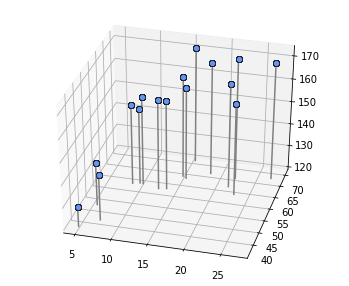

In [ ]:
# 나이,몸무게,키에 대한 데이터 분포
# 2차원 데이터의 표시 ------------------------
def show_data2(ax, x0, x1, t):
    for i in range(len(x0)):
        ax.plot([x0[i], x0[i]], [x1[i], x1[i]],
                [120, t[i]], color='gray')
        ax.plot(x0, x1, t, 'o',
                color='cornflowerblue', markeredgecolor='black',
                markersize=6, markeredgewidth=0.5)
        ax.view_init(elev=35, azim=-75)


# 메인 ------------------------------------
plt.figure(figsize=(6, 5))
ax = plt.subplot(1,1,1,projection='3d')
show_data2(ax, X0, X1, T)
plt.show()


###**5.2.1 데이터의 표시 방법**

데이터의 번호는 이미 n으로 나타냈으므로, 벡터의 요소(0=나이,1=몸무게 등) 번호는 m으로 나타내도록 한다. 데이터 번호 n, 요소 번호 m의 x를 $x_{n,m}$과 같이 오른쪽 아래 첨자로 표시한다. 구체적으로는 $x_{3,1}$과 같이 쓰고, 첨자 왼쪽의 숫자는 데이터 번호가 3임을 나타내고, 오른쪽의 숫자는 요소 번호가 1(=몸무게)임을 표시한다.

$x_n$ 이 2차원이 아니라 M차원이라면 $x_n = [x_{n,0},x_{n,1},\cdots,x_{n,M-1}]$과 같이 나타낸다.

###**5.2.2 면 모델**

N개의 2차원 벡터 $x_n$에 대해, 각각 $t_n$이 할당되어 있으므로 이 관계를 보려면 각각의 축에서 $x_{m=0} 과 x_{m=1}$, 그리고 t를 나타내는 3차원 플롯이 편리하다. 여기에 선이 아닌 면을 적용하면 새로운 $x = [x_0,x_1]$에 대해 t의 예측이 가능할 것이다.


SD=12.876 cm


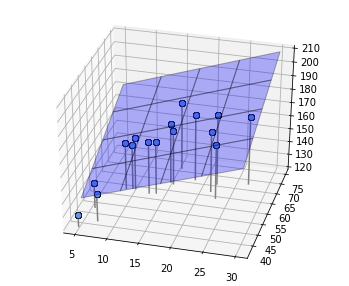

In [ ]:
#면의 표시 ----------------------------------
def show_plane(ax, w):
    px0 = np.linspace(X0_min, X0_max, 5)
    px1 = np.linspace(X1_min, X1_max, 5)
    px0, px1 = np.meshgrid(px0, px1)
    y = w[0]*px0 + w[1] * px1 + w[2]
    ax.plot_surface(px0, px1, y, rstride=1, cstride=1, alpha=0.3,
                    color='blue', edgecolor='black') 

#면의 MSE -----------------------------------
def mse_plane(x0, x1, t, w):
    y = w[0] * x0 + w[1] * x1 + w[2] # (A)
    mse = np.mean((y - t)**2)
    return mse

# 메인 ------------------------------------
plt.figure(figsize=(6, 5))
ax = plt.subplot(1, 1, 1, projection='3d')
W = [1.5, 1, 90]
show_plane(ax, W) 
show_data2(ax, X0, X1, T)
mse = mse_plane(X0, X1, T, W)
print("SD={0:.3f} cm".format(np.sqrt(mse)))
plt.show()


이 면의 함수는  $y(x) =w_0x_0 + w_1x_1 + w_2$ 로 표시된다.

w0,w1,w2에 다양한 값을 넣어서 여러 위치와 기울기를 가진 면을 나타낼 수 있다.

###**5.2.3 매개 변수의 해석해**

데이터에 가장 적합한 w = [w0,w1,w2]를 구해보자. 2차원 면 모델의 경우도 1차원의 선 모델과 마찬가지로 평균 제곱 오차를 정의할 수 있다.

$$ J = \frac{1}{N}\sum_{n=0}^{N-1}(y(x_n)-t_n)^2 = \frac{1}{N}\sum_{n=0}^{N-1}(w_0x_{n,0}+w_1x_{n,1}+w_2 - t_n)^2 $$

w를 움직이면 면이 여러 방향을 향햐며, 그에 따라 J가 변화된다. 목표는 J가 가장 작아지는 w= [w0,w1,w2]를 구하는 것이다. J를 최소화하는 최적의 w는 기울기가 0인, 즉 아주 작은 w의 변화에 대해서 J의 변화는 0이기 떄문에 J를 w0으로 편미분한것은 0이며, 또한 J를 w1로 편미분한 것도 0이고, w2로 편미분한 것도 0인$$\partial J/ \partial w_0 = 0 , \partial J/ \partial w_1 = 0, \partial J/ \partial w_2 = 0$$ 식이 성립된다.

위에 식에서 정의한 평균 제곱 오차와 각각의 편미분이 0인 값을 이용해서 식을 구하면 

$$w0 = \frac{cov(t,x_1)cov(x_0,x_1) - var(x_1)cov(t,x_0)}{cov(x_0,x_1)^2 -var(x_0)var(x1)}$$

$$w1 = \frac{cov(t,x_0)cov(x_0,x_1) - var(x_1)cov(t,x_1}{cov(x_0,x_1)^2 -var(x_0)var(x1)}$$

$$w2 = -w_0 <x_0> -w_1 <x_1> + <t> $$ 의 식을 얻을 수 있다.

여기에서 $var(a) = <a^2> -<a>^2$이고 $cov(a,b) = <ab> - <a><b> $다.
전자는 a의 분산, 후자는 a와 b의 공분산으로 a의 분산이란 a와 얼마나 차이가 있는지를 나타내고, a와b의 공분산은 a와b가 서로 얼마나 영향을 끼치고 있는지를 나타낸다.



w0=0.5, w1=1.1, w2=89.0
SD=2.546 cm


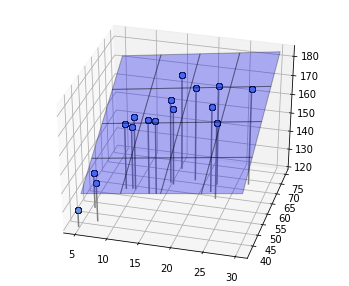

In [ ]:
#해석해를 이용해 x0,x1,T에 대한 w0,w1,w2를 구하고 그래프로 표시
# 해석해 ------------------------------------
def fit_plane(x0, x1, t):
    c_tx0 = np.mean(t * x0) - np.mean(t) * np.mean(x0)
    c_tx1 = np.mean(t * x1) - np.mean(t) * np.mean(x1)
    c_x0x1 = np.mean(x0 * x1) - np.mean(x0) * np.mean(x1)
    v_x0 = np.var(x0)
    v_x1 = np.var(x1)
    w0 = (c_tx1 * c_x0x1 - v_x1 * c_tx0) / (c_x0x1**2 - v_x0 * v_x1)
    w1 = (c_tx0 * c_x0x1 - v_x0 * c_tx1) / (c_x0x1**2 - v_x0 * v_x1)
    w2 = -w0 * np.mean(x0) - w1 * np.mean(x1) + np.mean(t)
    return np.array([w0, w1, w2]) 


# 메인 ------------------------------------
plt.figure(figsize=(6, 5))
ax = plt.subplot(1, 1, 1, projection='3d')
W = fit_plane(X0, X1, T)
print("w0={0:.1f}, w1={1:.1f}, w2={2:.1f}".format(W[0], W[1], W[2]))
show_plane(ax, W)
show_data2(ax, X0, X1, T)
mse = mse_plane(X0, X1, T, W)
print("SD={0:.3f} cm".format(np.sqrt(mse)))
plt.show()


오차의 표준편차 SD는 2.55cm로, 지난번의 선 모델일 때의 7cm보다 작아졌다. 키를 예측할 때 나이뿐 아니라 몸무게 정보가 있는 것이, 예측 정확도가 증가한다.

--------------------------------------------------

##**5.3 D차원 선형 회귀 모델**

x가 3차원,4차원 그 이상의 차원일 때 모든 공식을 고려한다면 엄청난 수고가 든다. 그래서 D차원으로 차원 수도 변수로 한 공식을 고려하는 방법을 생각한다.

###**5.3.1 D차원 선형 회귀 모델**

1차원 입력에서 다룬 직선 모델, 2차원 입력에:서 다룬 면 모델은 모두 선형 회귀 모델이라는 같은 종류의 모델이다. 이를 식으로 나타내면 다음과 같다.

$$y(x) = w_0x_0 + w_1x_1 + \cdots + w_{D-1}x_{D-1} + w_D$$

쉽게 살펴보기 위해 절편의 항을 포함하지 않는 모델로 생각하면

$$y(x) = w_0x_0 + w_1x_1 + \cdots + w_{D-1}x_{D-1}$$ 가 되고

이 모델을 행렬 표기법을 사용해 짧게 정리하면

$$ y(x) = w^Tx$$로 나타낼 수 있다.

###**5.3.2 매개 변수의 해석해**

지금까지와 마찬가지로 평균 제곱 오차J를 식으로 나타내면 다음과 같다.
$$ J = \frac{1}{N}\sum_{n=0}^{N-1}(y(x_n)-t_n)^2 = \frac{1}{N}\sum_{n=0}^{N-1}(w^Tx_n - t_n)^2 $$

이를 연쇄 법칙을 사용하여 $w_i$로 미분하면 다음과 같다.

$$\frac{\partial J}{\partial w_i} = \frac{1}{N}\frac{\partial}{\partial w_i}\sum_{n=0}^{N-1}(y(x_n)-t_n)^2 = \frac{2}{N}\sum_{n=0}^{N-1}(w^Tx_n - t_n)x_{n,i} $$
J를 최소로 만드는 w는 모든 $w_i$ 방향에 대한 기울기가 0인, 즉 편미분이 0이 되므로 아래와 같은 식이 성립한다.
$$\frac{2}{N}\sum_{n=0}^{N-1}(w^Tx_n - t_n)x_{n,i} = 0$$
식을 더 간단히 하면
$$\sum_{n=0}^{N-1}(w^Tx_n - t_n)x_{n,i} = 0$$ 이 된다.

또한 이 식은 모든 i에 적용 되므로 $$\sum_{n=0}^{N-1}(w^Tx_n - t_n)x_n^T = [ 0 \space 0 \cdots 0]$$ 이 되고 분배법칙 후 행렬로 표현하면 
$$w^TX^TX - t^TX= [ 0 \space 0 \cdots 0] $$ 의 식으로 나타낼 수 있다. 식을 더 전개시키면 최종적으로  $$ w = (X^TX)^{-1}X^Tt$$ 의 식을 얻을 수 있다.

이것이 바로 D차원 선형 회귀 모델의 해가 된다. 즉 x가 어떤 차원이라도 모두 이 형태에서 최적의 w를 얻을 수 있다는 결과다. 이때 이 식의 우변 $$(X^TX)^{-1}X^Tt$$ 에는 무어-펜로즈 의사 역행렬이라는 이름이 붙어 있다.

역행렬은 가로와 세로의 길이가 같은 정사각 행렬로밖에 정의할 수 없지만, 의사 역행렬은 정방 행렬이 아닌 행렬에 정의할 수 있는 역행렬의 대체 버전이다.

###**5.3.3 원점을 지나지 않는 면에 대한 확장**

이번에는 원점을 지나지 않는 면을 확장 다뤄보자. 데이터가 2차원인 경우에는 다음과 같은 식으로 나타낼 수 있다.

$$y(x) = w_0x_0 + w_1x_1$$

여기에 세 번째 매개 변수 w2를 더하면 면을 위아래로 이동할 수 있기 때문에, 원점을 지나지 않는 면을 표현할 수 있다.

$$y(x) = w_0x_0 + w_1x_1 + w_2$$

x는 2차원 벡터였지만, 항상 1을 얻는 3차원의 요소 x2 = 1을 추가하여 x를 3차원 벡터라고 생각한다. 이렇게 항상 1을 취하는 차원을 입력 데이터 x에 추가하면 원점에 얽매이지 않는 면을 구할 수 있다. 이것은 D차원의 x의 문제에 대해서도 마찬가지로, D+1번째 차원에 항상 1을 얻는 요소를 추가하면 자유롭게 움직이는 모델을 표현할 수 있다.

------------------------------------------------------------

##**5.4 선형 기저 함수 모델**

지금까지는 직선 모델을 사용하여 키를 예측했다. 그러나 데이터를 보면 완만하게 굽은 곡선에 데이터가 함께 있는 것처럼 보인다. 곡선을 사용하여 나타내면 오차가 더 작아질 수 있다.

곡선을 나타내는 모델은 여러가지 종류가 있지만, 여기에서는 범용성이 높은 '선형 기저 함수 모델'을 사용한다. 기저 함수는 '바탕이 되는 함수'라는 뜻이다. 5.3절에서 소개한 선형 회귀 모델의 x를 기저 함수 $\phi(x)$로 대체해 여러 형태의 함수를 만드는 것이 선형 기저 함수 모델의 생각이다. 

여기에서는 가우스 함수를 기저 함수로 선택한 선형 기저 함수 모델을 사용한다. 기저함수는 $\phi(x)_j$로 나타낸다.  $\phi$는 '파일'이라는 그리스 문자다. 기저함수는 여러 세트에서 사용되기 떄문에 그 번호를 나타내는 J에는 인덱스가 붙어있다.

이 가우스 기저 함수의 식은 다음과 같다.
$$ \phi(x)_j = exp\{-\frac{(x-\mu_j)^2}{2s^2}\}$$

가우스 함수의 중심 위치는 $\mu_j$이고 이는 모델의 설계자가 결정하는 매개 변수가 된다. 함수의 확장 정도는 s로 조절한다. 이 또한 설계자가 결정하는 매개 변수다.

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# 데이터 로드 ----------------------------
outfile = np.load('ch5_data.npz')
X = outfile['X']
X_min = outfile['X_min']
X_max = outfile['X_max']
X_n = outfile['X_n']
T = outfile['T']


In [ ]:

# 가우스 함수 ---------------------------------
def gauss(x, mu, s):
    return np.exp(-(x - mu)**2 / (2 * s**2))


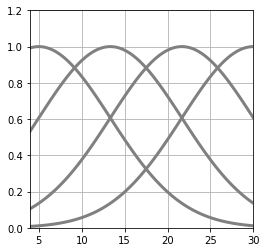

In [ ]:
# 4개의 가우스 함수를 나의의 범위 5~30으로 일정한 간격으로 배치하여 표시한다.
# 메인 ------------------------------------
M = 4
plt.figure(figsize=(4, 4))
mu = np.linspace(5, 30, M)
s = mu[1] - mu[0] # (A)
xb = np.linspace(X_min, X_max, 100)
for j in range(M):
    y = gauss(xb, mu[j], s)
    plt.plot(xb, y, color='gray', linewidth=3)
plt.grid(True)
plt.xlim(X_min, X_max)
plt.ylim(0, 1.2)
plt.show()


왼쪽에서 순서대로 $\phi_0(x),\phi_1(x),\phi_2(x),\phi_3(x)$라고 하고 이들에 각각 매개 변수 w0,w1,w2,w3을 곱해 모두 합한 수를 다음과 같이 표기한다.

$$y(x,w) = w_0\phi_0(x)+w_1\phi_1(x)+w_2\phi_2(x)+w_3\phi_3(x)+w_4$$

이것이 M=4의 선형 기저 함수 모델이다. 매개 변수 w를 '가중치 매개 변수'라고 한다. 마지막 w4는 다른 매개 변수와 달리 $\phi_j(x)$가 곱해지지 않았다. 그래서 항상 1을 출력하는 $\phi_4(x) = 1$이라고 하는 더미 기초 함수를 추가할 수 있다. 그러면 다음과 같이 깔끔하게 식을 나타낼 수 있다.

$$y(x,w) = \sum_{j=0}^{M}(w_j\phi_j(x)) = w^T\phi(x)$$

평균 제곱 오차 J는 다음과 같다.

$$J(w) = \frac{1}{N}\sum_{n=0}^{N-1}(w^T\phi(x_n)-t_n)^2 $$
이는 이전의 선형 모델의 평균 제곱 오차와 비슷한 모양을 하고 있다.

이를 통하여, 선형 기저 함수의 모델은 다음과 같이 해석된다.

* '전처리'로, 1차원 데이터 $x_n$을 M차원 데이터 벡터 $x_n = \phi(x_n)$으로 변환
* M차원 입력 $x_n$에 대해 선형 회귀 모델을 적용

즉, 선형 기저 함수 모델은 $\phi(x_n)$를 입력 $x_n$으로 해석한 선형 회귀 모델과 같다.

따라서 J를 최소화하는 매개 변수 w는 위의 해석해
$w = (X^TX)^{-1}X^Tt$의 X를 $\phi$로 대체한 다음의 식과 같이 나타낼 수 있다.

$$w = (\phi^T\phi)^{-1}\phi^Tt$$

In [ ]:

# 선형 기저 함수 모델 ----------------
def gauss_func(w, x):
    m = len(w) - 1
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]
    y = np.zeros_like(x) # x와 같은 크기로 요소가 0의 행렬 y를 작성
    for j in range(m):
        y = y + w[j] * gauss(x, mu[j], s)
    y = y + w[m]
    return y


In [ ]:

# 선형 기저 함수 모델 MSE ----------------
def mse_gauss_func(x, t, w):
    y = gauss_func(w, x)
    mse = np.mean((y - t)**2)
    return mse


In [ ]:

# 선형 기저 함수 모델 정확한 솔루션 -----------------
def fit_gauss_func(x, t, m):
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]
    n = x.shape[0]
    psi = np.ones((n, m+1))
    for j in range(m):
        psi[:, j] = gauss(x, mu[j], s)
    psi_T = np.transpose(psi)
    
    
    b = np.linalg.inv(psi_T.dot(psi))
    c = b.dot(psi_T)
    w = c.dot(t)
    return w


W=[29.4 75.7  2.9 98.3 54.9]
SD=3.98 cm


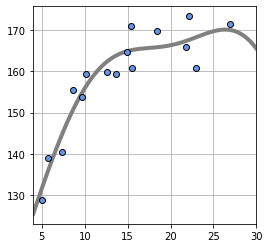

In [ ]:

# 가우스 기저 함수 표시 -----------------------
def show_gauss_func(w):
    xb = np.linspace(X_min, X_max, 100)
    y = gauss_func(w, xb)
    plt.plot(xb, y, c=[.5, .5, .5], lw=4) 


# 메인 ----------------------------------
plt.figure(figsize=(4, 4))
M = 4
W = fit_gauss_func(X, T, M)
show_gauss_func(W)
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
mse = mse_gauss_func(X, T, W)
print('W='+ str(np.round(W,1)))
print("SD={0:.2f} cm".format(np.sqrt(mse)))
plt.show()


선형 기저 함수 모델의 피팅 결과를 나타냈는데 항상 1을 출력하는 더미함수와 4개의 가우스 기저 함수를 합한 결과이다. 데이터에 따라 곡선이 알맞게 그어져 있다. 오차의 표준 편차 SD는 3.98cm로, 직선 모델 때의 오차 7cm보다 훨씬 줄어들었다.

---------------------------------------------------

##**5.5 오버피팅 문제**

그러면 기저 함수의 수 M은 어떻게 정할까? M을 충분히 크게 하면 잘 피팅이 되는걸까? 이를 확인하기 위해 M=2,4,7,9의 선형 기저 함수 모델을 사용하여 피팅을 시도했다.

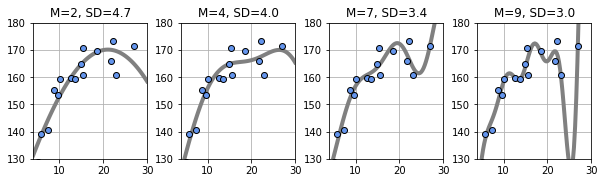

In [ ]:
#다양한 M을 적용하여 피팅을 시도
plt.figure(figsize=(10, 2.5))
plt.subplots_adjust(wspace=0.3)
M = [2, 4, 7, 9]
for i in range(len(M)):
    plt.subplot(1, len(M), i + 1)
    W = fit_gauss_func(X, T, M[i])
    show_gauss_func(W)
    plt.plot(X, T, marker='o', linestyle='None',
             color='cornflowerblue', markeredgecolor='black')
    plt.xlim(X_min, X_max)
    plt.grid(True)
    plt.ylim(130, 180)
    mse = mse_gauss_func(X, T, W)
    
    
    plt.title("M={0:d}, SD={1:.1f}".format(M[i], np.sqrt(mse)))
plt.show()


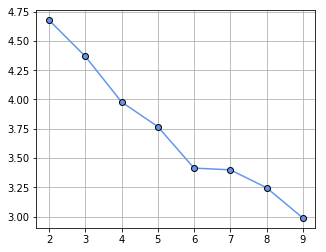

In [ ]:
# M의 크기에 따라 오차의 정도를 구함
plt.figure(figsize=(5, 4))
M = range(2, 10)
mse2 = np.zeros(len(M))
for i in range(len(M)):
    W = fit_gauss_func(X, T, M[i])
    mse2[i] = np.sqrt(mse_gauss_func(X, T, W))
plt.plot(M, mse2, marker='o',
         color='cornflowerblue', markeredgecolor='black')
plt.grid(True)
plt.show()


M이 7과 9가 되면 함수가 구부러진다. 오차가 감소하는지도 확인해 보면 M이 증가함에 따라 제대로 줄어들고 있다. M이 증가할수록 선형 기저 함수 모델은 작은 곡선도 표현할 수 있게 되므로 곡선은 데이터 점에 근접하게 되고, 오차(SD)는 점점 감소한다. 

한편, 데이터 점이 없는 곳은 평균 제곱 오차와 관계가 없다. 이 때문에 데이터 점이 있는 곳에서 억지로 가늘고 뾰족한 데이터 점에 가까워 지려고 하여, 데이터 점이 없는 곳에서는 뒤틀려 버린다.

이런건 좋은 현상이 아니다. 데이터 점의 오차는 작아져도, 새 데이터의 예측은 확실히 나빠지기 때문이다. 이러한 모델의 행동을 과적함(오버피팅)이라고 한다. 

그러면 최적의 M은 어떻게 찾을까? 평균 제곱 오차와 그 제곱근인 SD는 M이 증가하면 점점 감소하는 경향이 있기 때문에 최적의 M을 찾는 기준은 되지 않는다. 그래서 진정한 목적인 새 데이터에 대한 예측의 정확도를 생각해야 한다. 

예를 들어 데이터 x와 t의 4분의 1을 테스트 데이터로 , 나머지 4분의 3을 훈련 데이터로 나눈다. 그리고 모델 매개 변수 w는 훈련 데이터만을 사용하여 최적화 한다. 

즉, 훈련 데이터의 평균 제곱 오차를 최소화하도록 매개 변수w를 선택한다.그리고 w를 사용하여 테스트 데이터의 평균 제곱 오차를 계산하고, M의 평가 기준으로 한다. 즉, 훈련에 이용하지 않은 미지의 데이터에 대한 예측 오차로 M을 평가하는 것이다. 이 방법을 **홀드 아웃 검증**이라고 한다. 이 방법을 방금 시도한 M=2,4,7,9의 경우로 피팅해보자.

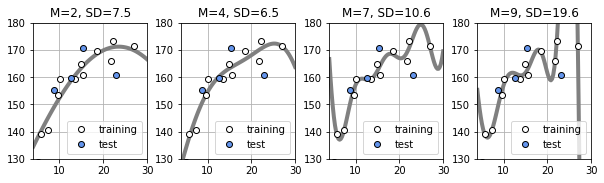

In [ ]:

# 훈련 데이터와 테스트 데이터 ------------------
X_test = X[:int(X_n / 4 + 1)]
T_test = T[:int(X_n / 4 + 1)]
X_train = X[int(X_n / 4 + 1):]
T_train = T[int(X_n / 4 + 1):]
# 메인 ------------------------------------
plt.figure(figsize=(10, 2.5))


plt.subplots_adjust(wspace=0.3)
M = [2, 4, 7, 9]
for i in range(len(M)):
    plt.subplot(1, len(M), i + 1)
    W = fit_gauss_func(X_train, T_train, M[i])
    show_gauss_func(W)
    plt.plot(X_train, T_train, marker='o',
             linestyle='None', color='white',
             markeredgecolor='black', label='training')
    plt.plot(X_test, T_test, marker='o', linestyle='None',
             color='cornflowerblue',
             markeredgecolor='black', label='test')
    plt.legend(loc='lower right', fontsize=10, numpoints=1)
    plt.xlim(X_min, X_max)
    plt.ylim(130, 180)
    plt.grid(True)
    mse = mse_gauss_func(X_test, T_test, W)
    plt.title("M={0:d}, SD={1:.1f}".format(M[i], np.sqrt(mse)))
plt.show()

M이 4,7,9로 증가함에 따라 곡선은 구부러져 훈련 데이터에 점점 접근해 간다. 그러나 피팅에 사용하지 않은 테스트 데이터에서는 벗어난다. 그러한 경향을 정량적으로 보기 위해 M을 2부터 9까지 하나씩 이동하여, 훈련 데이터와 테스트 데이터의 오차(SD)를 플롯했다.

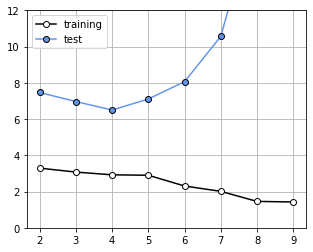

In [ ]:

plt.figure(figsize=(5, 4))
M = range(2, 10)
mse_train = np.zeros(len(M))
mse_test = np.zeros(len(M)) 
for i in range(len(M)):
    W = fit_gauss_func(X_train, T_train, M[i])
    mse_train[i] = np.sqrt(mse_gauss_func(X_train, T_train, W))
    mse_test[i] = np.sqrt(mse_gauss_func(X_test, T_test, W))
plt.plot(M, mse_train, marker='o', linestyle='-',
         markerfacecolor='white', markeredgecolor='black',
         color='black', label='training')
plt.plot(M, mse_test, marker='o', linestyle='-',
         color='cornflowerblue', markeredgecolor='black',
         label='test')
plt.legend(loc='upper left', fontsize=10)
plt.ylim(0, 12)
plt.grid(True)
plt.show()


M이 늘어나면 훈련 데이터의 오차는 감소하지만, 테스트 데이터의 오차는 M=4까지 내려간 뒤 M=5부터 증가하고 있다. 즉, M=5에서부터 오버피팅이 일어나고 있다.라고 말할 수 있다. 결과적으로 이번 홀드 아웃 검증에서는 M=4의 경우가 가장 데이터에 적합하다는 결론이 나왔다.

하지만 위의 결과는 테스트 데이터에서 어떤 데이터 점을 선택하느냐에 의존한다. 이러한 분류법에 의한 오차의 변동은 데이터 수가 충분하면 거의 없지만,이 예제처럼 데이터 수가 적은 경우에 두드러진다.

* **교차검증법**

그래서 위의 문제를 최대한 줄이는 교차 검증 방법을 사용한다. 다양한 분할에서 오차를 내고 평균을 계산하는 방법이다. 데이터를 분할하는 종류의 개수로 K겹 교차 검증으로 부르기도 한다.

데이터 x와 t를 K개로 분할하여 첫번째 데이터를 테스트 데이터로, 나머지를 훈련 데이터로 해서 훈련 데이터로 부터 모델 M의 매개 변수를 구하고, 이 매개 변수를 사용하여 테스트 데이터에서 평균 제곱 오차를 계산한다. 마찬가지로 두 번째 데이터를 테스트 데이터로 삼고, 나머지를 훈련 데이터로 하여 테스트 데이터의 오차를 계산한다. 이처럼 절차를 K회 반복하고 마지막에 K개의 평균 제곱 오차의 평균을 계산하여 이 숫자를 M의 평가값으로 한다. 최대 분할수는 K=N이다. 이때 테스트 데이터의 크기는 1이다. 이러한 경우를 특별히 'LOOCV'라고 한다. 데이터가 적은 경우에 이 방법이 사용된다.

In [ ]:

# K 분할 교차 검증 -----------------------------
def kfold_gauss_func(x, t, m, k):
    n = x.shape[0]
    mse_train = np.zeros(k)
    mse_test = np.zeros(k)
    for i in range(0, k):
        x_train = x[np.fmod(range(n), k) != i] # (A)
        t_train = t[np.fmod(range(n), k) != i] # (A)
        x_test = x[np.fmod(range(n), k) == i] # (A)
        t_test = t[np.fmod(range(n), k) == i] # (A)
        wm = fit_gauss_func(x_train, t_train, m)
        mse_train[i] = mse_gauss_func(x_train, t_train, wm)
        mse_test[i] = mse_gauss_func(x_test, t_test, wm)
    return mse_train, mse_test

In [ ]:

np.fmod(range(10),5)

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])

In [ ]:

M = 4
K = 4
kfold_gauss_func(X, T, M, K)

(array([12.87927851,  9.81768697, 17.2615696 , 12.92270498]),
 array([ 39.65348229, 734.70782018,  18.30921743,  47.52459642]))

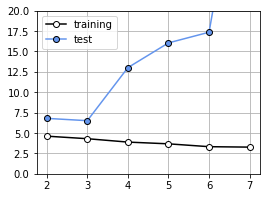

In [ ]:

M = range(2, 8)
K = 16
Cv_Gauss_train = np.zeros((K, len(M)))
Cv_Gauss_test = np.zeros((K, len(M)))
for i in range(0, len(M)):
    Cv_Gauss_train[:, i], Cv_Gauss_test[:, i] =\
                    kfold_gauss_func(X, T, M[i], K)
mean_Gauss_train = np.sqrt(np.mean(Cv_Gauss_train, axis=0))
mean_Gauss_test = np.sqrt(np.mean(Cv_Gauss_test, axis=0))


plt.figure(figsize=(4, 3))
plt.plot(M, mean_Gauss_train, marker='o', linestyle='-',
         color='k', markerfacecolor='w', label='training')
plt.plot(M, mean_Gauss_test, marker='o', linestyle='-',
         color='cornflowerblue', markeredgecolor='black', label='test')
plt.legend(loc='upper left', fontsize=10)
plt.ylim(0, 20)
plt.grid(True)
plt.show()

결과는 M=3일떄 , 테스트 데이터의 오차가 가장 작은 것을 알 수 있다. 즉,LOOCV에서는 M=3이 가장 적합하다는 결론이 나온다.

여기에서 교차 검증은 어디까지나 M을 구하기 위한 방법이며, 모델 매개 변수 w를 구하는 용도가 아니다. 이제 M=3이 최적임을 알고 있으므로, 그 모델의 매개 변수 w를 모든 데이터를 사용해 마지막으로 계산한다. 이 매개 변수 w를 사용한 곡선으로, 미지의 입력 데이터 x에 대한 예측 y를 출력하면 된다.

SD=4.37 cm


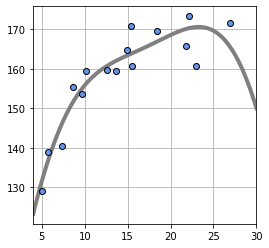

In [ ]:

M = 3
plt.figure(figsize=(4, 4))
W = fit_gauss_func(X, T, M)
show_gauss_func(W)
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue', markeredgecolor='black')
plt.xlim([X_min, X_max])
plt.grid(True)
mse = mse_gauss_func(X, T, W)
print("SD={0:.2f} cm".format(np.sqrt(mse)))
plt.show()

이번 테스트 데이터처럼 데이터 수가 적은 경우에는 교차 검증이 유용하다. 그러나 데이터 수가 많으면 교차 검증은 계산에 시간이 많이 걸린다. 이 경우에는 홀드아웃 검증을 사용하면 좋다. 데이터 수가 크면 홀드아웃 검증 결과가 교차 검증과 비슷하게 된다.

--------------------------------------

##**5.6 새로운 모델의 생성**

선형 기저 함수 모델을 도입하여 데이터와의 오차가 많이 개선되었다. 그러나 이 그래프에는 아직 문제가 있다. 25세에서 그래프가 급격히 내려간다는 것이다. 25세가 되면 갑자기 키가 줄어든다는 것은 상식에 맞지 않는다.

이것은 30세 주위의 데이터가 충분하지 않았기 때문에 일어난 결과다.'키는 나이가 들면서 점차 커지고 일정한 곳에서 수렴한다'는 지식을 모델에 어떻게 추가해야 할까?

바로 그 지식에 해당하는 모델을 만들면 된다. 나이 x가 증가함에 따라 키가 점차 증가하고, 결국에는 일정한 값으로 수렴하는 함수를 만들면 된다. 그 식은 다음과 같이 만들 수 있다.

$$y(x) = w_0 - w_1 exp(-w_2x)$$

x가 증가하면 exp(-w2x)는 0에 접근한다. 그 결과 1항의 w0만 값을 갖게 된다. 즉 x가 증가하면 y는 w0에 가까워진다. w0는 수렴하는 값을 결정하는 매개 변수다. w1은 그래프의 시작점을 결정하는 매개 변수고, w2는 그래프의 기울기를 결정하는 매개 변수다.

그러면 데이터에 맞는 매개 변수 w0,w1,w2를 구하기 위해 평균 제곱 오차 J가 되도록 w0,w1,w2를 선택해야 한다.

$$J = \frac{1}{N}\sum_{n=0}^{N-1}(y_n - t_n)^2 $$

여기서는 경사 하강법을 사용하여 수치적으로 w를 구하는 방법을 사용하였다. 함수의 최솟값 또는 최댓값을 구하는 문제는'최적화 문제'라고 불린다. 

여기서는 파이썬의 scipy.optimizer에 포함된 minimize 함수를 사용하여 최적 매개 변수를 구했다. 이 함수는 최솟값을 구하는 함수와 매개 변수의 초기 값만 주면, 함수의 미분을 주지 않아도 매개 변수의 극솟값을 출력해준다. 

In [ ]:

# 모델 A -----------------------------------
def model_A(x, w):
    y = w[0] - w[1] * np.exp(-w[2] * x)
    return y 


# 모델 A 표시 -------------------------------
def show_model_A(w):
    xb = np.linspace(X_min, X_max, 100)
    y = model_A(xb, w)
    plt.plot(xb, y, c=[.5, .5, .5], lw=4) 


# 모델 A의 MSE ------------------------------
def mse_model_A(w, x, t):
    y = model_A(x, w)
    mse = np.mean((y - t)**2)
    return mse

In [ ]:

from scipy.optimize import minimize 


# 모델 A의 매개 변수 최적화 -----------------
def fit_model_A(w_init, x, t):
    res1 = minimize(mse_model_A, w_init, args=(x, t), method="powell")
    return res1.x

w0=169.0, w1=113.7, w2=0.2
SD=3.86 cm


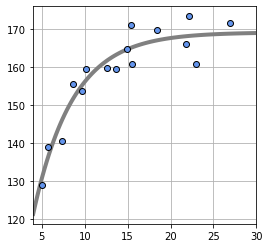

In [ ]:

# 메인 ------------------------------------
plt.figure(figsize=(4, 4))
W_init=[100, 0, 0]
W = fit_model_A(W_init, X, T)
print("w0={0:.1f}, w1={1:.1f}, w2={2:.1f}".format(W[0], W[1], W[2]))
show_model_A(W)
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue',markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
mse = mse_model_A(W, X, T)
print("SD={0:.2f} cm".format(np.sqrt(mse)))
plt.show()


오차의 SD는 3.86으로, 직선 모데 때의 오차 7cm 보다 훨씬 적으며, M=3의 선형 기저 함수 모델의 4.32에 비해서도 낮은 값이 되었다. 또한 그래프도 나이가 들면서 동시에 키가 커지며 일정한 값에서 수렴하는 형태가 되었다.

----------------------------------------------------

##**5.7 모델의 선택**

어떤 모델이 더 좋을지, 모델 간의 비교는 어떻게 해야할까?

모델 간의 비교에도 선형 기조 함수의 모델 M을 결정할 때와 같은 생각인,'미지의 데이터에 대한 예측 정확도로 평가한다'는 사고방식이 유요하다. 즉,홀드 아웃 검증과 교차 검증 모델로 모델의 좋고 나쁨을 평가할 수 있다.

Gauss(M=3) SD=6.51 cm
Model A SD=4.72 cm


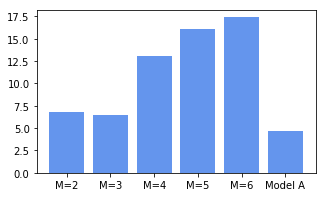

In [ ]:

# 교차 검증 model_A ---------------------------
def kfold_model_A(x, t, k):
    n = len(x)
    mse_train = np.zeros(k)
    mse_test = np.zeros(k)
    for i in range(0, k):
        x_train = x[np.fmod(range(n), k) != i]
        t_train = t[np.fmod(range(n), k) != i]
        x_test = x[np.fmod(range(n), k) == i]
        t_test = t[np.fmod(range(n), k) == i]
        wm = fit_model_A(np.array([169, 113, 0.2]), x_train, t_train)
        mse_train[i] = mse_model_A(wm, x_train, t_train)
        mse_test[i] = mse_model_A(wm, x_test, t_test)
    return mse_train, mse_test


# 메인 ------------------------------------
K = 16
Cv_A_train, Cv_A_test = kfold_model_A(X, T, K)
mean_A_test = np.sqrt(np.mean(Cv_A_test))
print("Gauss(M=3) SD={0:.2f} cm".format(mean_Gauss_test[1]))
print("Model A SD={0:.2f} cm".format(mean_A_test))
SD = np.append(mean_Gauss_test[0:5], mean_A_test)
M = range(6)
label = ["M=2", "M=3", "M=4", "M=5", "M=6", "Model A"]
plt.figure(figsize=(5, 3))
plt.bar(M, SD, tick_label=label, align="center",
facecolor="cornflowerblue")
plt.show()


새롭게 생각한 모델A의 테스트 데이터에 대한 오차는 4.72cm이다. 이는 M=3의 선형 기저 함수 모델의 오차 6.51cm 보다 헐씐 작은 것으로 나타났다. 즉 "선형 기저 함수 모델보다 모델 A 쪽이 데이터에 잘 어울린다"라고 할 수 있다. 

-----------------------------------------------

##**5.8 정리**

지금까지 지도 학습의 회귀 문제의 해결법을 대략적으로 설명했고 이 흐름은 어떠한 고도의 모델을 사용해도 기본적으로는 바뀌지 않는다.

다시 정리하자면

* 1. 입력 변수와 목표 변수 데이터가 있다.
* 2. 무엇을 가지고 예측의 정확도를 높일지 목적 함수를 결정한다.
* 3. 모델의 후보를 생각한다.
* 4. 홀드아웃 검증을 한다면, 데이터를 테스트 데이터와 훈련 데이터로 나눈다.
* 5. 훈련 데이터를 사용하여 원하는 함수가 최소가 되도록 각 모델의 매개 변수 w을 결정한다.
* 6. 이 모델 매개 변수를 사용하여 테스트 데이터의 입력 데이터 X에서 목표 데이터 t의 예측을 실시하여 가장 오차가 적은 모델을 선택한다.

모델이 결정되면 보유한 데이터를 모두 사용하여 모델 매개 변수를 최적화 한다. 최적화된 모델이 미지의 입력에 대해 가장 유력한 모델이 된다.

-------------------------------------------

#AFTER

* **해석해를 구할때 0인 값이 왜 최솟값을 보장하는가?**

비용함수를 평균 제곱 오차로 사용했기 때문에 w에 대한 오류 값은 오목한 그래프를 보장한다. 

* **회귀란 용어가 무엇인가?**

회귀의 사전적 정의는 '한바퀴 돌아 제자리로 돌아가다'입니다. 따라서 회귀 모델에서 말하는 '회귀'의 의미를 이해하려면 무엇이 어디로 회귀하는 것인지 아는 것이 중요하다. 

회귀 모델에서'회귀'는 '잔차(데이터의 실측치와 모델의 예측치 사이의 차이)가 평균으로 회귀하는 것'을 의미한다.

* **기저의 의미?**

선형대수학에서, 어떤 벡터 공간의 기저는 그 벡터 공간을 선형생성하는 선형독립인 벡터들이다. 달리 말해, 벡터 공간의 임의의 벡터에게 선형결합으로서 유일한 표현을 부여하는 벡터들이다.

모든 벡터는 기저의 선형결합으로 유일하게 표현되며, 서로 다른 벡터는 서로 다른 표현을 갖는다. 따라서 기저는 벡터를 식별하는 좌표를 부여한다.

벡터 공간의 차원은 기저 집합의 원소의 개수이다.

* **기저함수?**

특정한 규칙에 따라 만들어지는 함수의 열로써 충분히 많은 수의 함수가 있으면 어떤 모양의 함수라도 비슷하게 흉내낼 수 잇다.

* **기저함수가 쓰인 이유?**

기본적인 션형 회귀 모형은 입력 변수의 선형조합으로 이루어진다. 하지만 데이터가 비선형인 경우에 선형회귀모형으로는 한계가 있다.

비선형 모형을 만들기 위해서 데이터에 적합한 비선형 함수를 충분히 많이 생각해 낼 수 있어야 한다. 이러한 고층을 덜기 위해 만들어진 것이 기저 함수 모델이다. 

* **차원수를 늘리는 이유?**

차원을 늘려서 데이터를 더 잘 표현하기 위해서

* **가우스 함수를 사용한 이유**

사용한 데이터가 가우스 함수를 따르기 때문

* **과소 적합/ 과대 적합 판단 방법 중 분석- 편향 기반 탐지 방법**

분산(Variance) : Dataset 내 Data가 얼마나 퍼져 있는 지 정도

편향(Bias) : 데이터가 Target 떨어져 있는 정도

최적의 모델: (데이터가 target 근처[편향이 적음]에 잘 모여서[분산이 적음] 분포해 있는 분포)

* **powell algorithm**

[1] Univariate optimization(단변수 최적화)

x, y 축과 평행한 방향을 탐색 진행(함수 공간 N-dimensional space에서 1-dimension으로 변경[특정 변수를 고정하여]하여 단계적으로 minimum을 찾아내는 과정


[2] Powell's

앞선 Univariate optimization을 응용한 것
각 Unit vector 의 방향과 순서대로 진행한 뒤, 최초 지점에서 현재 위치까지의 방향을 새로운 Unit vector 삼아서 진행
최소화 함수를 사용할때, 늦게 수렴되거나 수렴이 보장되지 않는경우 실험적으로 사용하는 알고리즘